<a href="https://colab.research.google.com/github/RithwikRajSuram/HDS5210-RITHWIK/blob/main/FINAL/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**






This project focuses on analyzing healthcare data to identify patterns and trends in medical conditions, treatment costs, and healthcare utilization. The dataset incorporates various features, including patient demographics (age, gender), medical conditions (such as cancer, diabetes, and obesity), healthcare provider details, and financial aspects like billing amounts. By exploring this data through data collection, exploration, and transformation, we aim to uncover meaningful insights related to healthcare expenses and the factors influencing them. Additionally, we focus on exploring how different regions experience disparities in medical costs and treatment outcomes, ultimately guiding the improvement of healthcare systems and policies.

Throughout this project, I employed a series of data analysis techniques, including pivot tables, statistical measures, and advanced data visualizations, such as bar charts, pie charts, violin plots, and histograms. These visualizations have been crucial in understanding the distribution of medical expenses, the relationship between medical conditions and patient demographics, and the regional variations in healthcare access. By utilizing various tools and methods, the project offers an in-depth understanding of the healthcare landscape and reveals patterns that can inform policy changes, enhance resource allocation, and improve the quality of care provided to patients.

# **Datasets used**





Healthcare Dataset from Kaggle: The first dataset was sourced from Kaggle and contains detailed records of healthcare-related data, including patient demographics (age, gender), medical conditions (such as cancer, diabetes, obesity), healthcare providers, and financial data like billing amounts. This dataset enables us to analyze the distribution of medical expenses, the correlation between patient demographics and health conditions, and healthcare service utilization patterns across different regions.
* Source: https://www.kaggle.com/datasets/prasad22/healthcare-dataset

Insurance Dataset from GitHub: The second dataset, available on GitHub, provides data on insurance expenses, including features such as age, sex, BMI, number of children, smoking habits, region, and medical expenses. It offers valuable insights into how various factors such as lifestyle choices, demographic factors, and geographic location affect healthcare spending. This dataset supports our analysis of healthcare spending patterns across different patient groups and regions, helping us to further understand the economic impact of health-related conditions.

* Source: https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

# **Import Datasets**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
healthcare = pd.read_csv('healthcare_dataset.csv')

In [26]:
insurance = pd.read_json("insurance.json")

# **Exploratory Data analysis** (Data transformation)

In [27]:
healthcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2/2/2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,10/7/2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,11/18/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,12/18/2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,9/19/2022,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,10/9/2022,Penicillin,Abnormal


In [28]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [29]:
# Converting columns to appropriate data types
healthcare['Name'] = healthcare['Name'].astype('string')

In [30]:
# Convert 'Discharge Date' to datetime
healthcare['Discharge Date'] = pd.to_datetime(healthcare['Discharge Date'])

# Convert 'Date of Admission' to datetime
healthcare['Date of Admission'] = pd.to_datetime(healthcare['Date of Admission'])

In [31]:
# Convert Gender, Blood Type, and Medical Condition to categorical
healthcare['Gender'] = healthcare['Gender'].astype('category')
healthcare['Blood Type'] = healthcare['Blood Type'].astype('category')
healthcare['Medical Condition'] = healthcare['Medical Condition'].astype('category')

In [32]:
# Convert Doctor, Hospital, and Insurance Provider to string
healthcare['Doctor'] = healthcare['Doctor'].astype('string')
healthcare['Hospital'] = healthcare['Hospital'].astype('string')
healthcare['Insurance Provider'] = healthcare['Insurance Provider'].astype('string')

In [33]:
# Convert 'Admission Type', 'Medication', and 'Test Results' to categorical
healthcare['Admission Type'] = pd.Categorical(healthcare['Admission Type'])
healthcare['Medication'] = pd.Categorical(healthcare['Medication'])
healthcare['Test Results'] = pd.Categorical(healthcare['Test Results'])

In [34]:
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [35]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
insurance['sex'] = insurance['sex'].astype('category')

In [37]:
# Convert 'smoker' and 'region' columns to categorical
insurance['smoker'] = pd.Categorical(insurance['smoker'])
insurance['region'] = pd.Categorical(insurance['region'])

# **Data Pivoting**

In [38]:
# Pivot table for average billing amount by insurance provider
pivot_billing = healthcare.pivot_table(values='Billing Amount',
                                      index='Insurance Provider',
                                      aggfunc='mean',
                                       observed=False)
pivot_billing


,Billing Amount
Insurance Provider,
Aetna,25553.294506
Blue Cross,25613.011503
Cigna,25525.766314
Medicare,25615.990508
UnitedHealthcare,25389.172390


In [39]:
# Pivot table for count of records by medical condition and admission type
pivot_condition_admission = healthcare.pivot_table(values='Name',
                                                  index='Medical Condition',
                                                  columns='Admission Type',
                                                  aggfunc='count',
                                                   observed=False)
pivot_condition_admission

Admission Type,Elective,Emergency,Urgent
Medical Condition,,,
Arthritis,3083,3108,3117
Asthma,3102,3002,3081
Cancer,3148,3015,3064
Diabetes,3058,3017,3229
Hypertension,3221,3001,3023
Obesity,3043,3126,3062


In [40]:
# Pivot table for count of patients by doctor and medical condition
pivot_doctor_condition = healthcare.pivot_table(values='Name',
                                               index='Doctor',
                                               columns='Medical Condition',
                                               aggfunc='count',
                                               observed=False)
pivot_doctor_condition.head()

Medical Condition,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
Doctor,,,,,,
Aaron Acevedo,0,0,0,0,0,1
Aaron Adams,0,0,1,0,0,0
Aaron Aguilar,1,0,0,0,0,0
Aaron Alexander,0,1,0,0,0,0
Aaron Anderson,1,0,0,0,0,0


In [41]:
# Pivot table for average billing amount by medical condition
pivot_billing_condition = healthcare.pivot_table(values='Billing Amount',
                                                index='Medical Condition',
                                                aggfunc='mean',
                                                 observed=False)
pivot_billing_condition


,Billing Amount
Medical Condition,
Arthritis,25497.327056
Asthma,25635.249359
Cancer,25161.792707
Diabetes,25638.405577
Hypertension,25497.095761
Obesity,25805.971259


# **Data Merging**

Data merging 1: Merge both the datasets insurance and healthcare to get more insights

In [42]:
insurance.rename(columns={'sex':'Gender', 'age':'Age'}, inplace=True)
healthcare['Gender'] = healthcare['Gender'].str.lower()
insurance['Gender'] = insurance['Gender'].str.lower()

# Remove duplicates based on 'Name' before merging
healthcare_unique = healthcare.drop_duplicates(subset=['Name', 'Gender', 'Age'])
insurance_unique = insurance.drop_duplicates(subset=['Gender', 'Age'])

# Perform the merge
merged_healthcare = healthcare_unique.merge(insurance_unique, on=['Gender', 'Age'], how='inner')

# Display the result
merged_healthcare.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,bmi,children,smoker,region,expenses
0,Bobby JacksOn,30,male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,35.3,0,yes,southwest,36837.47
1,LesLie TErRy,62,male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,27.6,1,no,northwest,13937.67
2,andrEw waTtS,28,female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,34.8,0,no,northwest,3556.92
3,adrIENNE bEll,43,female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,35.7,2,no,northeast,19144.58
4,EMILY JOHNSOn,36,male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal,35.2,1,yes,southeast,38709.18


The dataset provides a comprehensive view of healthcare and insurance data, merged based on age and gender, with key attributes including patient demographics, medical conditions, treatment details, and financial information. It offers insights into healthcare utilization and costs across different regions and demographics, highlighting patterns related to medical conditions, treatment expenses, and factors like smoking and family size. This data is valuable for healthcare providers and policymakers to optimize resource allocation, improve treatment effectiveness, and understand the relationship between medical conditions, costs, and socioeconomic factors influencing health outcomes.

Data merging 2:

In [43]:
# Remove duplicates based on 'Name', 'Age', and 'Gender' before merging
healthcare_unique = healthcare.drop_duplicates(subset=['Name', 'Age', 'Gender'])
insurance_unique = insurance.drop_duplicates(subset=['Age', 'Gender'])

# Merge the healthcare and insurance data on 'Age' and 'Gender'
merged_data = pd.merge(healthcare_unique, insurance_unique, on=['Age', 'Gender'])

# Select relevant columns to display
columns_to_display = ['Name', 'Age', 'Gender', 'Medical Condition', 'Billing Amount', 'expenses', 'region']
merged_data = merged_data[columns_to_display]

# Show the merged data
merged_data.head()


,Name,Age,Gender,Medical Condition,Billing Amount,expenses,region
0,Bobby JacksOn,30,male,Cancer,18856.281306,36837.47,southwest
1,LesLie TErRy,62,male,Obesity,33643.327287,13937.67,northwest
2,andrEw waTtS,28,female,Diabetes,37909.782410,3556.92,northwest
3,adrIENNE bEll,43,female,Cancer,14238.317814,19144.58,northeast
4,EMILY JOHNSOn,36,male,Asthma,48145.110951,38709.18,southeast


The dataset has been cleaned by removing duplicates based on patient 'Name', 'Age', and 'Gender' before merging healthcare and insurance data. This results in a unique dataset that includes medical conditions, billing amounts, expenses, and regional data. The merged dataset provides a comprehensive view of healthcare spending and patient demographics, useful for further analysis and decision-making in healthcare management.

# **Data visualizations**

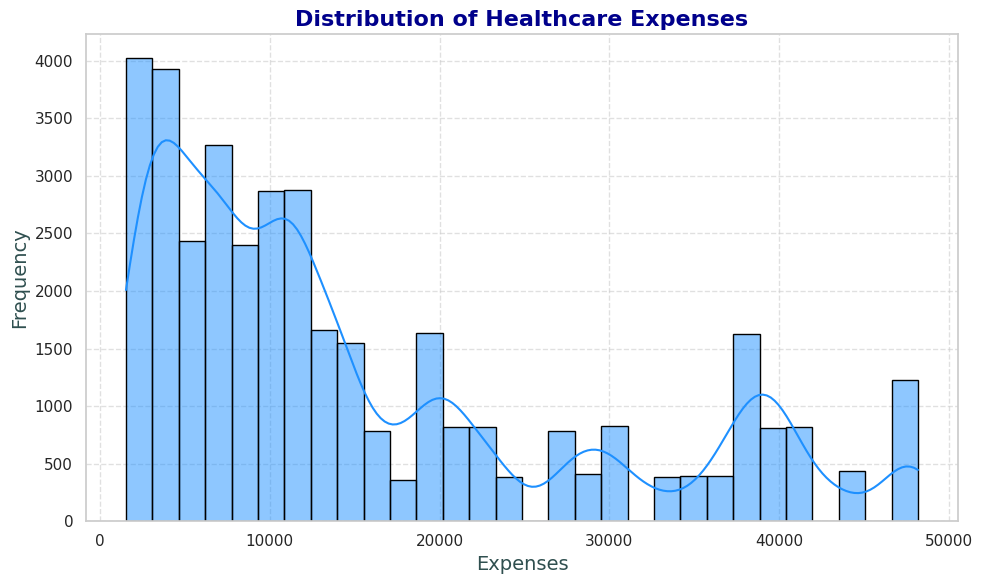

In [44]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the histogram with kernel density estimation (KDE)
sns.histplot(merged_data['expenses'], bins=30, kde=True, color='dodgerblue', edgecolor='black')

# Enhance title and labels with different font sizes
plt.title('Distribution of Healthcare Expenses', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Expenses', fontsize=14, color='darkslategray')
plt.ylabel('Frequency', fontsize=14, color='darkslategray')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Tight layout to avoid clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

The above chart visualizes the distribution of healthcare expenses in the dataset. The histogram shows the frequency of different expense ranges, while the overlaid kernel density estimate (KDE) curve provides a smoothed version of the distribution. The data exhibits a highly skewed distribution, with most expenses clustered at the lower end (under $10,000). As expenses increase, the frequency sharply drops, indicating that a smaller number of cases account for the higher medical costs. This pattern suggests that while most patients incur relatively low costs, a few have significantly higher medical expenses. This kind of distribution is important for understanding healthcare spending patterns, helping healthcare providers and policymakers to identify cost outliers and potential areas for cost management.

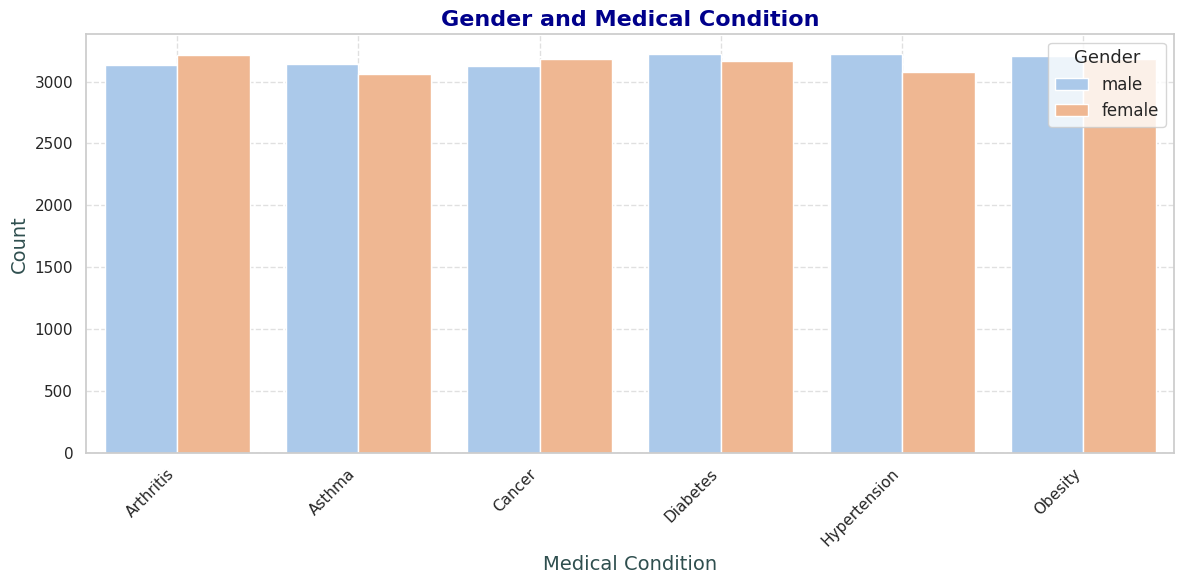

In [45]:

sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the countplot with a custom color palette and a clear, readable format
sns.countplot(data=merged_data, x='Medical Condition', hue='Gender', palette='pastel')

# Enhance the title with a larger font size and bold weight
plt.title('Gender and Medical Condition', fontsize=16, fontweight='bold', color='darkblue')

# Customize the labels to be more readable and elegant
plt.xlabel('Medical Condition', fontsize=14, color='darkslategray')
plt.ylabel('Count', fontsize=14, color='darkslategray')

# Rotate the x-axis labels for better readability of long text
plt.xticks(rotation=45, ha='right')

# Enhance the legend with better positioning and larger font size
plt.legend(title='Gender', title_fontsize='13', loc='upper right', fontsize='12')

# Add a gridline for better readability of the plot
plt.grid(True, linestyle='--', alpha=0.6)

# Ensure the plot fits within the figure
plt.tight_layout()

# Display the plot
plt.show()


This bar chart provides a comparison of the counts of various medical conditions across different genders (male and female). The chart visually illustrates the distribution of medical conditions like Arthritis, Asthma, Cancer, Diabetes, Hypertension, and Obesity, with distinct bars for male and female patients. The gender comparison highlights differences in the frequency of these conditions, allowing us to easily observe any potential gender disparities in the healthcare data. For example, it can be observed that the counts of certain conditions, such as Hypertension and Obesity, are relatively similar between males and females, while others might show more significant differences. This type of visualization is helpful in identifying potential areas for targeted health interventions or further study into gender-related health patterns.

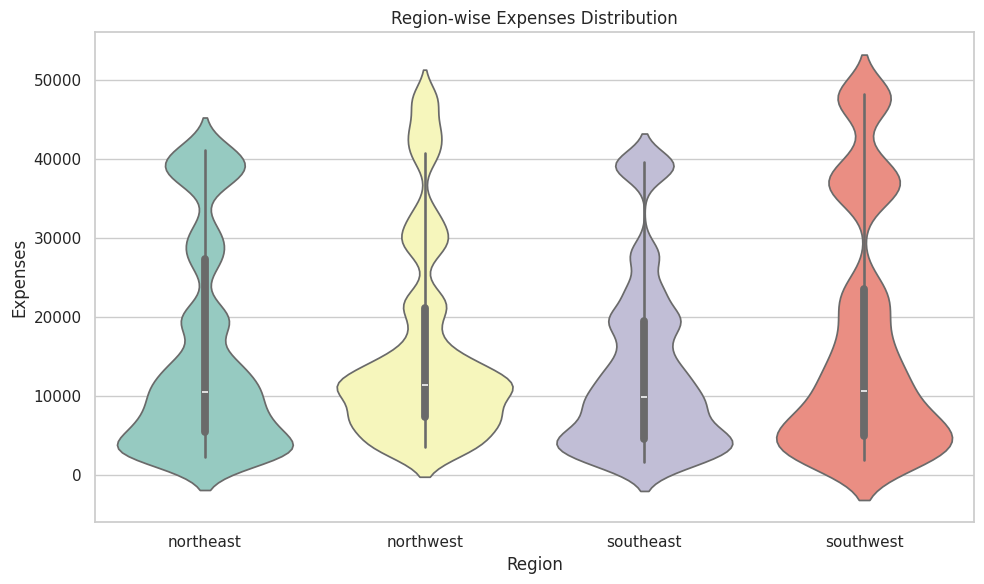

In [46]:
# Create a violin plot for expenses distribution by region
plt.figure(figsize=(10, 6))
sns.violinplot(data=merged_data, x='region', y='expenses', hue='region', palette='Set3', legend=False)
plt.title('Region-wise Expenses Distribution')
plt.xlabel('Region')
plt.ylabel('Expenses')
plt.tight_layout()
plt.show()

The violin plot above visually demonstrates the distribution of medical expenses across different regions. The plot shows that the expenses vary significantly between regions, with the Southeast and Southwest regions exhibiting a wider spread of expenses, indicating greater variation in medical costs. In contrast, the Northeast and Northwest regions display more concentrated distributions around the lower to mid-range of expenses, suggesting less variability in medical expenses in those areas. The plot also highlights the median expense for each region, with the Southeast and Southwest regions showing higher average expenses compared to the others. This analysis is useful in identifying regional disparities in healthcare spending and can guide healthcare providers and policymakers in resource allocation and cost management.

# **Conclusion**

In conclusion, this project provided a comprehensive analysis of healthcare data, revealing important trends and disparities in medical expenses and conditions across various patient demographics and regions. Through effective data collection, exploration, pivot table generation, and data visualization, actionable insights were derived that can help stakeholders optimize resource utilization, reduce costs, and address the gaps in healthcare access. These findings can support policymakers and healthcare providers in making informed decisions aimed at enhancing patient care and improving healthcare system efficiency.